[0.0, 0.117, 0.586, 0.12, 0.25, 0.107, 0.188, 0.092, 0.158, 0.093, 0.901, 0.126, 0.152, 0.122, 0.396, 0.131, 0.294, 0.102, 0.252, 0.103, 0.388, 0.099, 0.123, 0.089]
[0.117, 0.823, 1.18, 1.46, 1.711, 2.738, 3.012, 3.539, 3.935, 4.29, 4.777, 4.989]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


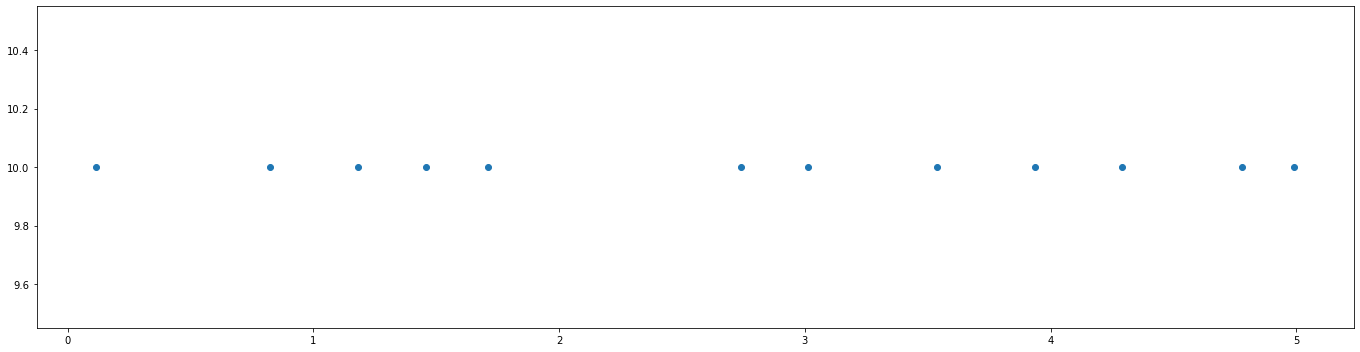

In [4]:
import re
import matplotlib.pyplot as plt
import numpy as np

# read in the marco file
f = open('demo.txt')
lines = f.readlines()
# extract all the delays from the file 
result = []
for line in lines:
    if "<Delay>" in line:
        result.append(int(re.sub('\D', '', line)))
        
# insert 0 at the beginning 
result.insert(0, 0)
# convert to float, and round to 4 decimal place
result = [float(i)*0.001 for i in result]
result = [round(i, 4) if isinstance(i, float) else i for i in result]

# sum every two delays together as a single mouse click
sum_list = []
for i in range(0, len(result)-1, 2):
    if isinstance(result[i], float) and isinstance(result[i+1], float):
        sum_list.append(result[i] + result[i+1])
for i in range(1, len(sum_list)):
    sum_list[i] += sum_list[i-1]
sum_list = [round(i, 4) if isinstance(i, float) else i for i in sum_list]

# ones for x2 
ones = np.ones(len(sum_list))

plt.rcParams["figure.figsize"] = [19, 5]
plt.rcParams["figure.autolayout"] = True
plt.scatter(sum_list, 10*ones)
print(result)
print(sum_list)
print(ones)